In [21]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
df = pd.read_csv('../data/listings.csv')
df

C:\Users\panaham\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,...,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,...,5.00,5.00,5.00,NaN,t,7,0,7,0,5.17
4,49248255,https://www.airbnb.com/rooms/49248255,20230306014634,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,397288055,...,4.88,4.72,4.64,NaN,f,1,1,0,0,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42926,40342902,https://www.airbnb.com/rooms/40342902,20230306014634,2023-03-07,previous scrape,Cozy room in prime area,NaN,NaN,https://a0.muscache.com/pictures/19e0731e-c69e...,90429772,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
42927,35257699,https://www.airbnb.com/rooms/35257699,20230306014634,2023-03-07,city scrape,Hell's Kitchen /Times Sq - Comfortable 2 BDR Flat,"Location Location. Hell's Kitchen, Times Squar...",NaN,https://a0.muscache.com/pictures/51ede1d9-e522...,264962468,...,4.75,4.91,4.51,NaN,f,1,1,0,0,4.79
42928,52491515,https://www.airbnb.com/rooms/52491515,20230306014634,2023-03-07,city scrape,Cozy 3 bedroom apt in the heart of Lower East ...,This comfortable apartment in the heart of Low...,NaN,https://a0.muscache.com/pictures/824c07e0-2bf1...,305489297,...,4.86,5.00,4.14,NaN,f,6,6,0,0,0.43
42929,48158801,https://www.airbnb.com/rooms/48158801,20230306014634,2023-03-07,previous scrape,Spacious Loft Space / Photo studio in Bushwick,Looking for a two month subleter. LGBTQ+ and a...,NaN,https://a0.muscache.com/pictures/cb171d83-e0ab...,6600525,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [23]:
df = df[['id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]
df.dropna()
df = df.drop(df[df['price'] == 0].index)


In [24]:
# Replace the '$' sign with an empty string in the 'price' column
df['price'] = df['price'].str.replace('$', '')

# Remove commas from the 'price' column
df['price'] = df['price'].str.replace(',', '')

# Convert the 'price' column to float
df['price'] = df['price'].astype(float)

C:\Users\panaham\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


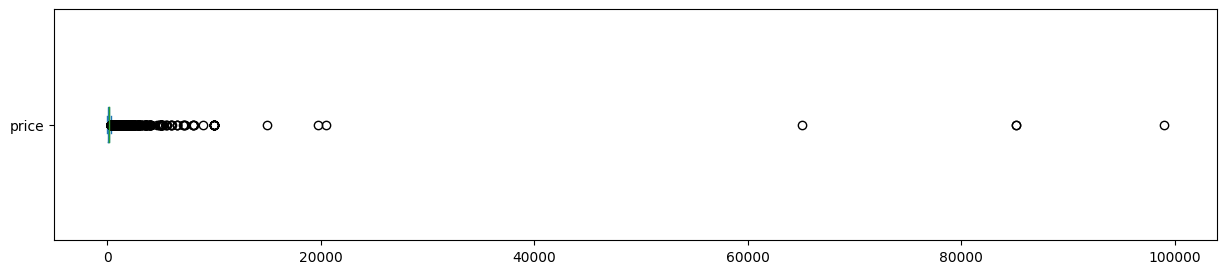

Values over $500.00: 
1970
4.5888%


Values equal to $0: 
27
0.0629%


In [25]:

# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to 
500.00
print('Values over $500.00: ')
print(len(df[df['price'] > 500]))
print('{:.4f}%'.format((len(df[df['price'] > 500]) / df.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(df[df['price'] == 0]))
print('{:.4f}%'.format((len(df[df['price'] == 0]) / df.shape[0]) * 100))

In [26]:

# Selecting the rows that fulfil the established requirements
df = df[(df['price'] <= 500) & (df['price'] > 0)].copy()
df.reset_index()

,index,id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,...,accommodates,bathrooms,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,0,801749842377802394,2023-01-10,NaN,NaN,f,Canarsie,Brooklyn,40.640403,-73.888535,...,2,NaN,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",143.0,364,0,NaN,NaN
1,1,765948794133787266,2022-11-22,100%,100%,f,Canarsie,Brooklyn,40.648510,-73.894330,...,1,NaN,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",30.0,41,13,4.85,4.29
2,2,636274456676328779,2022-05-27,NaN,NaN,f,Tottenville,Staten Island,40.507114,-74.251907,...,6,NaN,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",157.0,364,0,NaN,NaN
3,3,768125251187660469,2022-08-18,99%,98%,t,Sheepshead Bay,Brooklyn,40.583490,-73.959880,...,2,NaN,3.0,1.0,"[""Security cameras on property"", ""Keypad"", ""Ca...",89.0,364,15,5.00,5.17
4,4,49248255,2021-04-16,75%,68%,f,North Riverdale,Bronx,40.903260,-73.907090,...,3,NaN,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125.0,46,25,4.48,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40929,42926,40342902,2016-08-17,NaN,NaN,f,East Village,Manhattan,40.726110,-73.988010,...,1,NaN,1.0,1.0,"[""Hangers"", ""Kitchen"", ""Dishes and silverware""...",85.0,0,0,NaN,NaN
40930,42927,35257699,2019-05-29,100%,100%,f,Hell's Kitchen,Manhattan,40.762150,-73.990270,...,6,NaN,2.0,3.0,"[""Hangers"", ""Microwave"", ""Dishwasher"", ""Dishes...",208.0,23,217,4.48,4.79
40931,42928,52491515,2019-10-30,100%,70%,f,Lower East Side,Manhattan,40.717330,-73.991110,...,3,NaN,3.0,3.0,"[""Hangers"", ""Dishes and silverware"", ""Lockbox""...",125.0,191,7,4.43,0.43
40932,42929,48158801,2013-05-27,NaN,NaN,f,Bushwick,Brooklyn,40.687350,-73.917660,...,1,NaN,6.0,1.0,"[""Lock on bedroom door"", ""Fire extinguisher"", ...",50.0,0,0,NaN,NaN


In [27]:
df = df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
df = df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'})

dataset = df[['price', 'room_type', 'neighbourhood_group', 'neighbourhood', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds']]

dataset = dataset.dropna()
# display the modified dataframe
print(dataset)

       price        room_type neighbourhood_group    neighbourhood  \
0      143.0     Private room            Brooklyn         Canarsie   
1       30.0     Private room            Brooklyn         Canarsie   
2      157.0  Entire home/apt       Staten Island      Tottenville   
3       89.0     Private room            Brooklyn   Sheepshead Bay   
4      125.0  Entire home/apt               Bronx  North Riverdale   
...      ...              ...                 ...              ...   
42925  350.0  Entire home/apt           Manhattan  Lower East Side   
42926   85.0     Private room           Manhattan     East Village   
42927  208.0  Entire home/apt           Manhattan   Hell's Kitchen   
42928  125.0  Entire home/apt           Manhattan  Lower East Side   
42929   50.0     Private room            Brooklyn         Bushwick   

      host_is_superhost  accommodates  bedrooms  beds  
0                     f             2       1.0   1.0  
1                     f             1       1.0

In [28]:
# Define categorical feature columns
cat_cols = ["room_type", "neighbourhood_group", "host_is_superhost"]

# Create one-hot encoder for categorical features
encoder = OneHotEncoder()
transformer = ColumnTransformer(
    transformers=[("cat", encoder, cat_cols)],
    remainder="passthrough"
)

# Transform data using one-hot encoder
encoded_cols = transformer.fit_transform(dataset)
feature_names = transformer.get_feature_names_out()  

dataset = pd.DataFrame(encoded_cols, columns=feature_names)


dataset


,cat__room_type_Entire home/apt,cat__room_type_Hotel room,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,cat__host_is_superhost_f,cat__host_is_superhost_t,remainder__price,remainder__neighbourhood,remainder__accommodates,remainder__bedrooms,remainder__beds
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,143.0,Canarsie,2,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0,Canarsie,1,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,157.0,Tottenville,6,2.0,2.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,89.0,Sheepshead Bay,2,3.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,125.0,North Riverdale,3,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36477,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,350.0,Lower East Side,5,2.0,3.0
36478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,85.0,East Village,1,1.0,1.0
36479,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,208.0,Hell's Kitchen,6,2.0,3.0
36480,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,125.0,Lower East Side,3,3.0,3.0


In [29]:
neighbourhood_means = dataset.groupby('remainder__neighbourhood')['remainder__price'].mean()
dataset['neighbourhood_Encoded'] = dataset['remainder__neighbourhood'].map(neighbourhood_means)
dataset

,cat__room_type_Entire home/apt,cat__room_type_Hotel room,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,cat__host_is_superhost_f,cat__host_is_superhost_t,remainder__price,remainder__neighbourhood,remainder__accommodates,remainder__bedrooms,remainder__beds,neighbourhood_Encoded
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,143.0,Canarsie,2,1.0,1.0,127.520913
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0,Canarsie,1,1.0,1.0,127.520913
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,157.0,Tottenville,6,2.0,2.0,143.750000
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,89.0,Sheepshead Bay,2,3.0,1.0,118.853147
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,125.0,North Riverdale,3,2.0,2.0,145.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36477,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,350.0,Lower East Side,5,2.0,3.0,179.108014
36478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,85.0,East Village,1,1.0,1.0,177.273016
36479,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,208.0,Hell's Kitchen,6,2.0,3.0,212.536713
36480,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,125.0,Lower East Side,3,3.0,3.0,179.108014


In [30]:
print(len(dataset.neighbourhood_Encoded.unique()))
print(len(dataset.remainder__neighbourhood.unique()))

219
221


In [31]:
# Select rows with NaN values
df_with_nan = dataset[dataset.isna().any(axis=1)]
# Print the resulting DataFrame
dataset.drop(df_with_nan.index)
df_with_nan = dataset[dataset.isna().any(axis=1)]
dataset

,cat__room_type_Entire home/apt,cat__room_type_Hotel room,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,cat__host_is_superhost_f,cat__host_is_superhost_t,remainder__price,remainder__neighbourhood,remainder__accommodates,remainder__bedrooms,remainder__beds,neighbourhood_Encoded
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,143.0,Canarsie,2,1.0,1.0,127.520913
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0,Canarsie,1,1.0,1.0,127.520913
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,157.0,Tottenville,6,2.0,2.0,143.750000
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,89.0,Sheepshead Bay,2,3.0,1.0,118.853147
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,125.0,North Riverdale,3,2.0,2.0,145.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36477,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,350.0,Lower East Side,5,2.0,3.0,179.108014
36478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,85.0,East Village,1,1.0,1.0,177.273016
36479,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,208.0,Hell's Kitchen,6,2.0,3.0,212.536713
36480,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,125.0,Lower East Side,3,3.0,3.0,179.108014


In [32]:
y = dataset['remainder__price']
X = dataset.drop(['remainder__neighbourhood', 'remainder__price'], axis=1)
# X = X.drop(['neighbourhood_Encoded'], axis=1)
# X = X.drop('remainder__price', axis=1)
features = [col for col in X]
X

,cat__room_type_Entire home/apt,cat__room_type_Hotel room,cat__room_type_Private room,cat__room_type_Shared room,cat__neighbourhood_group_Bronx,cat__neighbourhood_group_Brooklyn,cat__neighbourhood_group_Manhattan,cat__neighbourhood_group_Queens,cat__neighbourhood_group_Staten Island,cat__host_is_superhost_f,cat__host_is_superhost_t,remainder__accommodates,remainder__bedrooms,remainder__beds,neighbourhood_Encoded
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,1.0,1.0,127.520913
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,1.0,127.520913
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6,2.0,2.0,143.750000
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,3.0,1.0,118.853147
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,2.0,2.0,145.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36477,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,2.0,3.0,179.108014
36478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1.0,1.0,177.273016
36479,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6,2.0,3.0,212.536713
36480,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,3.0,3.0,179.108014


In [33]:
scaled_data = preprocessing.scale(X)  
scaled_data

array([[-1.05955219, -0.06094423,  1.09949459, ..., -0.49361951,
        -0.58804547, -0.39608669],
       [-1.05955219, -0.06094423,  1.09949459, ..., -0.49361951,
        -0.58804547, -0.39608669],
       [ 0.94379495, -0.06094423, -0.9095088 , ...,  0.91107837,
         0.38342919, -0.03427154],
       ...,
       [ 0.94379495, -0.06094423, -0.9095088 , ...,  0.91107837,
         1.35490385,  1.49927588],
       [ 0.94379495, -0.06094423, -0.9095088 , ...,  2.31577625,
         1.35490385,  0.75400847],
       [-1.05955219, -0.06094423,  1.09949459, ...,  6.52986989,
        -0.58804547, -1.03724057]])

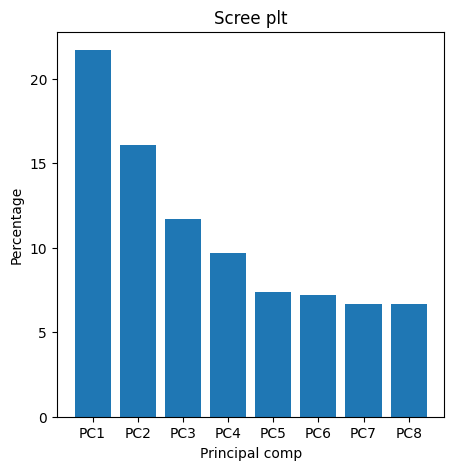

In [34]:
pca = PCA(n_components=8)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(5, 5))
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

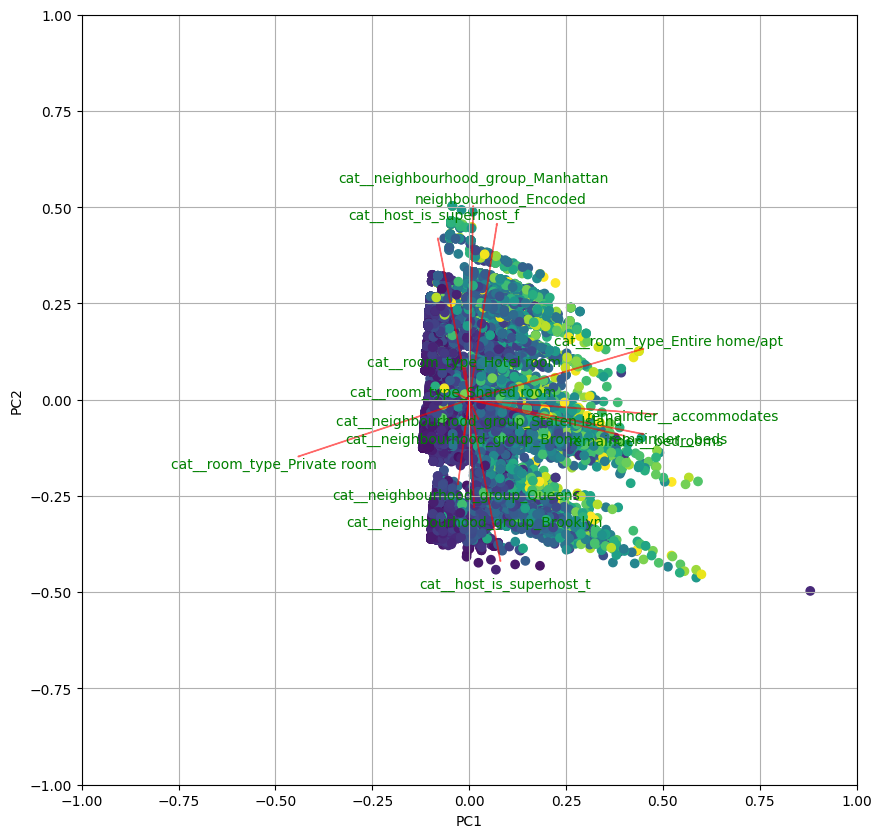

In [35]:

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(10, 10))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.

myplot(pca_data,np.transpose(pca.components_),features)
plt.show()

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to predict yield using PC1 and PC2
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# Compute the R^2 score for the training set
y_train_pred = reg.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)

# Compute the R^2 score for the test set
y_test_pred = reg.predict(X_test_pca)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 score for training set: {r2_train}")
print(f"R^2 score for test set: {r2_test}")

R^2 score for training set: 0.4748495920979655
R^2 score for test set: 0.47735714769685955
